In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from tqdm import tqdm
from datetime import datetime
import json
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [24]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [25]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [ ]:
train.describe(include='all')

In [ ]:
test.describe(include='all')

In [26]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [27]:
test.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

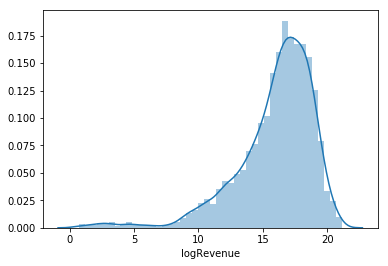

In [28]:
train['logRevenue'] = np.log1p(train['revenue'])
sns.distplot(train['logRevenue'] )

Date Time Information

In [29]:
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train['release_date']) 
train['release_dayofweek'] = releaseDate.dt.dayofweek
train['release_quarter'] = releaseDate.dt.quarter

In [30]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d
train = train
train['genres'] = train['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
genres = train.genres.str.get_dummies(sep=',')
train = pd.concat([train, genres], axis=1, sort=False)
print("Action Genres Movie           ", train[train.Action == 1].shape[0])
print("Adventure Genres Movie        ", train[train.Adventure == 1].shape[0])
print("Animation Genres Movie        ", train[train.Animation == 1].shape[0])
print("Comedy Genres Movie           ", train[train.Comedy == 1].shape[0])
print("Crime Genres Movie            ", train[train.Crime == 1].shape[0])
print("Documentary Genres Movie      ", train[train.Documentary == 1].shape[0])
print("Drama Genres Movie            ", train[train.Drama == 1].shape[0])
print("Family Genres Movie           ", train[train.Family == 1].shape[0])
print("Fantasy Genres Movie          ", train[train.Fantasy == 1].shape[0])
print("Foreign Genres Movie          ", train[train.Foreign == 1].shape[0])
print("History Genres Movie          ", train[train.History == 1].shape[0])
print("Music Genres Movie            ", train[train.Music == 1].shape[0])
print("Mystery Genres Movie          ", train[train.Mystery == 1].shape[0])
print("Romance Genres Movie          ", train[train.Romance == 1].shape[0])
print("Science Fiction Genres Movie  ", train[train['Science Fiction'] == 1].shape[0])
print("TV Movie Genres Movie         ", train[train['TV Movie'] == 1].shape[0])
print("Thriller Genres Movie         ", train[train.Thriller == 1].shape[0])
print("War Genres Movie              ", train[train.War == 1].shape[0])
print("Western Genres Movie          ", train[train.Western == 1].shape[0])

Action Genres Movie            741
Adventure Genres Movie         439
Animation Genres Movie         141
Comedy Genres Movie            1028
Crime Genres Movie             469
Documentary Genres Movie       87
Drama Genres Movie             1531
Family Genres Movie            260
Fantasy Genres Movie           232
Foreign Genres Movie           31
History Genres Movie           132
Music Genres Movie             100
Mystery Genres Movie           225
Romance Genres Movie           571
Science Fiction Genres Movie   290
TV Movie Genres Movie          1
Thriller Genres Movie          789
War Genres Movie               100
Western Genres Movie           43


In [31]:
test = test
test['genres'] = test['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
genres = test.genres.str.get_dummies(sep=',')
test = pd.concat([test, genres], axis=1, sort=False)
print("Action Genres Movie           ", test[test.Action == 1].shape[0])
print("Adventure Genres Movie        ", test[test.Adventure == 1].shape[0])
print("Animation Genres Movie        ", test[test.Animation == 1].shape[0])
print("Comedy Genres Movie           ", test[test.Comedy == 1].shape[0])
print("Crime Genres Movie            ", test[test.Crime == 1].shape[0])
print("Documentary Genres Movie      ", test[test.Documentary == 1].shape[0])
print("Drama Genres Movie            ", test[test.Drama == 1].shape[0])
print("Family Genres Movie           ", test[test.Family == 1].shape[0])
print("Fantasy Genres Movie          ", test[test.Fantasy == 1].shape[0])
print("Foreign Genres Movie          ", test[test.Foreign == 1].shape[0])
print("History Genres Movie          ", test[test.History == 1].shape[0])
print("Music Genres Movie            ", test[test.Music == 1].shape[0])
print("Mystery Genres Movie          ", test[test.Mystery == 1].shape[0])
print("Romance Genres Movie          ", test[test.Romance == 1].shape[0])
print("Science Fiction Genres Movie  ", test[test['Science Fiction'] == 1].shape[0])
print("TV Movie Genres Movie          0")
print("Thriller Genres Movie         ", test[test.Thriller == 1].shape[0])
print("War Genres Movie              ", test[test.War == 1].shape[0])
print("Western Genres Movie          ", test[test.Western == 1].shape[0])

Action Genres Movie            994
Adventure Genres Movie         677
Animation Genres Movie         241
Comedy Genres Movie            1577
Crime Genres Movie             615
Documentary Genres Movie       134
Drama Genres Movie             2145
Family Genres Movie            415
Fantasy Genres Movie           396
Foreign Genres Movie           53
History Genres Movie           163
Music Genres Movie             167
Mystery Genres Movie           325
Romance Genres Movie           864
Science Fiction Genres Movie   454
TV Movie Genres Movie          0
Thriller Genres Movie          1080
War Genres Movie               143
Western Genres Movie           74


Has Homepage

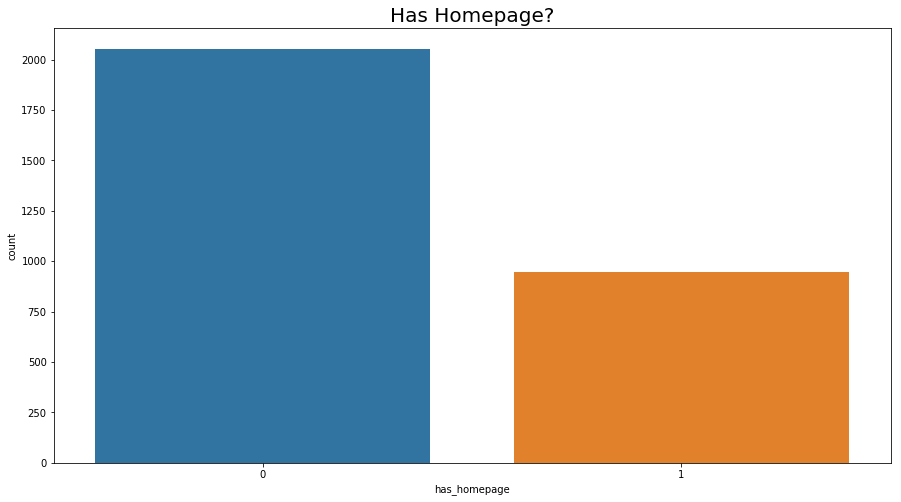

In [32]:


train['has_homepage'] = 1
train.loc[pd.isnull(train['homepage']) ,"has_homepage"] = 0
plt.figure(figsize=(15,8))
sns.countplot(train['has_homepage'].sort_values())
plt.title("Has Homepage?",fontsize=20)
plt.show()



In [34]:
def prepare(df):
    global json_cols
    global train_dict

    df[['release_month','release_day','release_year']]=df['release_date'].str.split('/',expand=True).replace(np.nan, 0).astype(int)
    df['release_year'] = df['release_year']
    df.loc[ (df['release_year'] <= 19) & (df['release_year'] < 100), "release_year"] += 2000
    df.loc[ (df['release_year'] > 19)  & (df['release_year'] < 100), "release_year"] += 1900
    
    releaseDate = pd.to_datetime(df['release_date']) 
    df['release_dayofweek'] = releaseDate.dt.dayofweek 
    df['release_quarter'] = releaseDate.dt.quarter     
    
#     rating_na = df.groupby(["release_year","original_language"])['rating'].mean().reset_index()
#     df[df.rating.isna()]['rating'] = df.merge(rating_na, how = 'left' ,on = ["release_year","original_language"])
#     vote_count_na = df.groupby(["release_year","original_language"])['totalVotes'].mean().reset_index()
#     df[df.totalVotes.isna()]['totalVotes'] = df.merge(vote_count_na, how = 'left' ,on = ["release_year","original_language"])
#     #df['rating'] = df['rating'].fillna(1.5)
#     #df['totalVotes'] = df['totalVotes'].fillna(6)
#     df['weightedRating'] = ( df['rating']*df['totalVotes'] + 6.367 * 1000 ) / ( df['totalVotes'] + 1000 )


    df['originalBudget'] = df['budget']
    df['inflationBudget'] = df['budget'] + df['budget']*1.8/100*(2018-df['release_year']) #Inflation simple formula
    df['budget'] = np.log1p(df['budget']) 
    
    
    # Thanks to this Kernel for the next 7 features https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation
    df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    df['_collection_name'] = df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
    le = LabelEncoder()
    le.fit(list(df['_collection_name'].fillna('')))
    df['_collection_name'] = le.transform(df['_collection_name'].fillna('').astype(str))
    df['_num_Keywords'] = df['Keywords'].apply(lambda x: len(x) if x != {} else 0)
    df['_num_cast'] = df['cast'].apply(lambda x: len(x) if x != {} else 0)

    
    
    df['_popularity_mean_year'] = df['popularity'] / df.groupby("release_year")["popularity"].transform('mean')
    df['_budget_runtime_ratio'] = df['budget']/df['runtime'] 
    df['_budget_popularity_ratio'] = df['budget']/df['popularity']
    df['_budget_year_ratio'] = df['budget']/(df['release_year']*df['release_year'])
    df['_releaseYear_popularity_ratio'] = df['release_year']/df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity']/df['release_year']

#     df['_popularity_totalVotes_ratio'] = df['totalVotes']/df['popularity']
#     df['_rating_popularity_ratio'] = df['rating']/df['popularity']
#     df['_rating_totalVotes_ratio'] = df['totalVotes']/df['rating']
#     df['_totalVotes_releaseYear_ratio'] = df['totalVotes']/df['release_year']
#     df['_budget_rating_ratio'] = df['budget']/df['rating']
#     df['_runtime_rating_ratio'] = df['runtime']/df['rating']
#     df['_budget_totalVotes_ratio'] = df['budget']/df['totalVotes']
    
    df['has_homepage'] = 1
    df.loc[pd.isnull(df['homepage']) ,"has_homepage"] = 0
    
    df['isbelongs_to_collectionNA'] = 0
    df.loc[pd.isnull(df['belongs_to_collection']) ,"isbelongs_to_collectionNA"] = 1
    
    df['isTaglineNA'] = 0
    df.loc[df['tagline'] == 0 ,"isTaglineNA"] = 1 

    df['isOriginalLanguageEng'] = 0 
    df.loc[ df['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
    
    df['isTitleDifferent'] = 1
    df.loc[ df['original_title'] == df['title'] ,"isTitleDifferent"] = 0 

    df['isMovieReleased'] = 1
    df.loc[ df['status'] != "Released" ,"isMovieReleased"] = 0 

    # get collection id
    df['collection_id'] = df['belongs_to_collection'].apply(lambda x : np.nan if len(x)==0 else x[0]['id'])
    
    df['original_title_letter_count'] = df['original_title'].str.len() 
    df['original_title_word_count'] = df['original_title'].str.split().str.len() 


    df['title_word_count'] = df['title'].str.split().str.len()
    df['overview_word_count'] = df['overview'].str.split().str.len()
    df['tagline_word_count'] = df['tagline'].str.split().str.len()
    
    df['production_countries_count'] = df['production_countries'].apply(lambda x : len(x))
    df['production_companies_count'] = df['production_companies'].apply(lambda x : len(x))
    df['cast_count'] = df['cast'].apply(lambda x : len(x))
    df['crew_count'] = df['crew'].apply(lambda x : len(x))
    

    df['meanruntimeByYear'] = df.groupby("release_year")["runtime"].aggregate('mean')
    df['meanPopularityByYear'] = df.groupby("release_year")["popularity"].aggregate('mean')
    df['meanBudgetByYear'] = df.groupby("release_year")["budget"].aggregate('mean')
#     df['meantotalVotesByYear'] = df.groupby("release_year")["totalVotes"].aggregate('mean')
#     df['meanTotalVotesByRating'] = df.groupby("rating")["totalVotes"].aggregate('mean')
    df['medianBudgetByYear'] = df.groupby("release_year")["budget"].aggregate('median')

    for col in ['genres', 'production_countries', 'spoken_languages', 'production_companies'] :
        df[col] = df[col].map(lambda x: sorted(list(set([n if n in train_dict[col] else col+'_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x)))
        temp = df[col].str.get_dummies(sep=',')
        df = pd.concat([df, temp], axis=1, sort=False)
    df.drop(['genres_etc'], axis = 1, inplace = True)
    
    df = df.drop(['id', 'revenue','belongs_to_collection','genres','homepage','imdb_id','overview','runtime'
    ,'poster_path','production_companies','production_countries','release_date','spoken_languages'
    ,'status','title','Keywords','cast','crew','original_language','original_title','tagline', 'collection_id'
    ],axis=1)
    
    df.fillna(value=0.0, inplace = True) 

    return df
train = pd.read_csv('train.csv')

#power_six = train.id[train.budget > 1000][train.revenue < 100]

#for k in power_six :
#    train.loc[train['id'] == k,'revenue'] =  train.loc[train['id'] == k,'revenue'] * 1000000
#Clean Datapower_six 
 
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000





test = pd.read_csv('test.csv')

#Clean Data
test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30


test['revenue'] = np.nan

# features from https://www.kaggle.com/kamalchhirang/eda-simple-feature-engineering-external-data
# train = pd.merge(train, pd.read_csv('../input/tmdb-competition-additional-features/TrainAdditionalFeatures.csv'), how='left', on=['imdb_id'])
# test = pd.merge(test, pd.read_csv('../input/tmdb-competition-additional-features/TestAdditionalFeatures.csv'), how='left', on=['imdb_id'])

# additionalTrainData = pd.read_csv('../input/tmdb-box-office-prediction-more-training-data/additionalTrainData.csv')
# additionalTrainData['release_date'] = additionalTrainData['release_date'].astype('str')
# additionalTrainData['release_date'] = additionalTrainData['release_date'].str.replace('-', '/')
train = train

#train = pd.merge(train, additionalTrainData, how='left', on=['imdb_id'],axis=1)
print(train.columns)
print(train.shape)
train['revenue'] = np.log1p(train['revenue'])
y = train['revenue'].values

json_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

for col in tqdm(json_cols + ['belongs_to_collection']) :
    train[col] = train[col].apply(lambda x : get_dictionary(x))
    test[col] = test[col].apply(lambda x : get_dictionary(x))
    
def get_json_dict(df) :
    global json_cols
    result = dict()
    for e_col in json_cols :
        d = dict()
        rows = df[e_col].values
        for row in rows :
            if row is None : continue
            for i in row :
                if i['name'] not in d :
                    d[i['name']] = 0
                d[i['name']] += 1
        result[e_col] = d
    return result

train_dict = get_json_dict(train)
test_dict = get_json_dict(test)

# remove cateogry with bias and low frequency
for col in json_cols :
    
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))   
    
    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove) :
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
            
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
        if i in test_dict[col] :
            del test_dict[col][i]
            
all_data = prepare(pd.concat([train, test]).reset_index(drop = True))
train = all_data.loc[:train.shape[0] - 1,:]
test = all_data.loc[train.shape[0]:,:] 

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
(3000, 23)


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.05it/s]


In [35]:
train

,budget,popularity,release_month,release_day,release_year,release_dayofweek,release_quarter,originalBudget,inflationBudget,genders_0_crew,...,UK Film Council,United Artists,Universal Pictures,Village Roadshow Pictures,Walt Disney Pictures,Warner Bros.,Wild Bunch,Wildwood Enterprises,Working Title Films,production_companies_etc
0,16.454568,6.575393,2,20,2015,4.0,1.0,14000000,1.475600e+07,59,...,0,1,0,0,0,0,0,0,0,0
1,17.504390,8.248895,8,6,2004,4.0,3.0,40000000,5.008000e+07,1,...,0,0,0,0,1,0,0,0,0,0
2,15.009433,64.299990,10,10,2014,4.0,4.0,3300000,3.537600e+06,49,...,0,0,0,0,0,0,0,0,0,1
3,13.997833,3.174936,3,9,2012,4.0,1.0,1200000,1.329600e+06,3,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,1.148070,2,5,2009,3.0,1.0,0,0.000000e+00,2,...,0,0,0,0,0,0,0,0,0,0
5,15.894952,0.743274,8,6,1987,3.0,3.0,8000000,1.246400e+07,7,...,0,0,0,0,0,0,0,0,0,0
6,16.454568,7.286477,8,30,2012,3.0,3.0,14000000,1.551200e+07,60,...,0,0,0,0,0,0,0,0,0,1
7,0.000000,1.949044,1,15,2004,3.0,1.0,0,0.000000e+00,0,...,0,0,0,0,0,0,0,0,0,0
8,0.000000,6.902423,2,16,1996,4.0,1.0,0,0.000000e+00,1,...,0,0,0,0,1,0,0,0,0,1
9,15.607270,4.672036,4,16,2003,2.0,2.0,6000000,7.620000e+06,3,...,0,0,0,0,0,0,0,0,0,0


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [5]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


https://www.kaggle.com/kamalchhirang/eda-feature-engineering-lgb-xgb-cat/notebook

In [6]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

In [7]:
def prepare(df):
    global json_cols
    global train_dict

    df[['release_month','release_day','release_year']]=df['release_date'].str.split('/',expand=True).replace(np.nan, 0).astype(int)
    df['release_year'] = df['release_year']
    df.loc[ (df['release_year'] <= 19) & (df['release_year'] < 100), "release_year"] += 2000
    df.loc[ (df['release_year'] > 19)  & (df['release_year'] < 100), "release_year"] += 1900
    
    releaseDate = pd.to_datetime(df['release_date']) 
    df['release_dayofweek'] = releaseDate.dt.dayofweek 
    df['release_quarter'] = releaseDate.dt.quarter     
    
#     rating_na = df.groupby(["release_year","original_language"])['rating'].mean().reset_index()
#     df[df.rating.isna()]['rating'] = df.merge(rating_na, how = 'left' ,on = ["release_year","original_language"])
#     vote_count_na = df.groupby(["release_year","original_language"])['totalVotes'].mean().reset_index()
#     df[df.totalVotes.isna()]['totalVotes'] = df.merge(vote_count_na, how = 'left' ,on = ["release_year","original_language"])
#     #df['rating'] = df['rating'].fillna(1.5)
#     #df['totalVotes'] = df['totalVotes'].fillna(6)
#     df['weightedRating'] = ( df['rating']*df['totalVotes'] + 6.367 * 1000 ) / ( df['totalVotes'] + 1000 )


    df['originalBudget'] = df['budget']
    df['inflationBudget'] = df['budget'] + df['budget']*1.8/100*(2018-df['release_year']) #Inflation simple formula
    df['budget'] = np.log1p(df['budget']) 
    
    
    # Thanks to this Kernel for the next 7 features https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation
    df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    df['_collection_name'] = df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
    le = LabelEncoder()
    le.fit(list(df['_collection_name'].fillna('')))
    df['_collection_name'] = le.transform(df['_collection_name'].fillna('').astype(str))
    df['_num_Keywords'] = df['Keywords'].apply(lambda x: len(x) if x != {} else 0)
    df['_num_cast'] = df['cast'].apply(lambda x: len(x) if x != {} else 0)

    
    
    df['_popularity_mean_year'] = df['popularity'] / df.groupby("release_year")["popularity"].transform('mean')
    df['_budget_runtime_ratio'] = df['budget']/df['runtime'] 
    df['_budget_popularity_ratio'] = df['budget']/df['popularity']
    df['_budget_year_ratio'] = df['budget']/(df['release_year']*df['release_year'])
    df['_releaseYear_popularity_ratio'] = df['release_year']/df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity']/df['release_year']

#     df['_popularity_totalVotes_ratio'] = df['totalVotes']/df['popularity']
#     df['_rating_popularity_ratio'] = df['rating']/df['popularity']
#     df['_rating_totalVotes_ratio'] = df['totalVotes']/df['rating']
#     df['_totalVotes_releaseYear_ratio'] = df['totalVotes']/df['release_year']
#     df['_budget_rating_ratio'] = df['budget']/df['rating']
#     df['_runtime_rating_ratio'] = df['runtime']/df['rating']
#     df['_budget_totalVotes_ratio'] = df['budget']/df['totalVotes']
    
    df['has_homepage'] = 1
    df.loc[pd.isnull(df['homepage']) ,"has_homepage"] = 0
    
    df['isbelongs_to_collectionNA'] = 0
    df.loc[pd.isnull(df['belongs_to_collection']) ,"isbelongs_to_collectionNA"] = 1
    
    df['isTaglineNA'] = 0
    df.loc[df['tagline'] == 0 ,"isTaglineNA"] = 1 

    df['isOriginalLanguageEng'] = 0 
    df.loc[ df['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
    
    df['isTitleDifferent'] = 1
    df.loc[ df['original_title'] == df['title'] ,"isTitleDifferent"] = 0 

    df['isMovieReleased'] = 1
    df.loc[ df['status'] != "Released" ,"isMovieReleased"] = 0 

    # get collection id
    df['collection_id'] = df['belongs_to_collection'].apply(lambda x : np.nan if len(x)==0 else x[0]['id'])
    
    df['original_title_letter_count'] = df['original_title'].str.len() 
    df['original_title_word_count'] = df['original_title'].str.split().str.len() 


    df['title_word_count'] = df['title'].str.split().str.len()
    df['overview_word_count'] = df['overview'].str.split().str.len()
    df['tagline_word_count'] = df['tagline'].str.split().str.len()
    
    df['production_countries_count'] = df['production_countries'].apply(lambda x : len(x))
    df['production_companies_count'] = df['production_companies'].apply(lambda x : len(x))
    df['cast_count'] = df['cast'].apply(lambda x : len(x))
    df['crew_count'] = df['crew'].apply(lambda x : len(x))
    

    df['meanruntimeByYear'] = df.groupby("release_year")["runtime"].aggregate('mean')
    df['meanPopularityByYear'] = df.groupby("release_year")["popularity"].aggregate('mean')
    df['meanBudgetByYear'] = df.groupby("release_year")["budget"].aggregate('mean')
#     df['meantotalVotesByYear'] = df.groupby("release_year")["totalVotes"].aggregate('mean')
#     df['meanTotalVotesByRating'] = df.groupby("rating")["totalVotes"].aggregate('mean')
    df['medianBudgetByYear'] = df.groupby("release_year")["budget"].aggregate('median')

    for col in ['genres', 'production_countries', 'spoken_languages', 'production_companies'] :
        df[col] = df[col].map(lambda x: sorted(list(set([n if n in train_dict[col] else col+'_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x)))
        temp = df[col].str.get_dummies(sep=',')
        df = pd.concat([df, temp], axis=1, sort=False)
    df.drop(['genres_etc'], axis = 1, inplace = True)
    
    df = df.drop(['id', 'revenue','belongs_to_collection','genres','homepage','imdb_id','overview','runtime'
    ,'poster_path','production_companies','production_countries','release_date','spoken_languages'
    ,'status','title','Keywords','cast','crew','original_language','original_title','tagline', 'collection_id'
    ],axis=1)
    
    df.fillna(value=0.0, inplace = True) 

    return df

In [8]:
json_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

for col in tqdm(json_cols + ['belongs_to_collection']) :
    train[col] = train[col].apply(lambda x : get_dictionary(x))
    test[col] = test[col].apply(lambda x : get_dictionary(x))
    
def get_json_dict(df) :
    global json_cols
    result = dict()
    for e_col in json_cols :
        d = dict()
        rows = df[e_col].values
        for row in rows :
            if row is None : continue
            for i in row :
                if i['name'] not in d :
                    d[i['name']] = 0
                d[i['name']] += 1
        result[e_col] = d
    return result

train_dict = get_json_dict(train)
test_dict = get_json_dict(test)

# remove cateogry with bias and low frequency
for col in json_cols :
    
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))   
    
    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove) :
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
            
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
        if i in test_dict[col] :
            del test_dict[col][i]
            
all_data = prepare(pd.concat([train, test]).reset_index(drop = True))
train = all_data.loc[:train.shape[0] - 1,:]
test = all_data.loc[train.shape[0]:,:]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.00s/it]
C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [8]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)


# Dealing with Collections

In [10]:
train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

train['collection_name'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

test['collection_name'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['has_collection'] = test['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

train = train.drop(['belongs_to_collection'], axis=1)
test = test.drop(['belongs_to_collection'], axis=1)



# Dealing with genres

In [11]:
train.genres[1]

[{'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 10749, 'name': 'Romance'}]

In [10]:
train['genres'].apply(lambda x: len(x) if x != {} else 0)[:5]

0    1
1    4
2    1
3    2
4    2
Name: genres, dtype: int64

In [11]:
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

In [12]:
train['num_of_genres'] = train['genres'].apply(lambda x: len(x) if x != {} else 0)
test['num_of_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)

In [13]:
train = train.drop('genres', axis = 1)
test = test.drop('genres', axis = 1)

In [14]:
train.production_companies.apply(lambda x: len(x) if x != {} else 0).value_counts() #How many have x amount of production companies for the film

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

In [15]:
train.production_companies.apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

0       Metro-Goldwyn-Mayer (MGM) Paramount Pictures U...
1                                    Walt Disney Pictures
2       Blumhouse Productions Bold Films Right of Way ...
3                                                        
4                                                        
5                                                        
6              Ghost House Pictures North Box Productions
7                                                        
8       Jim Henson Company, The Jim Henson Productions...
9                               Castle Rock Entertainment
10                                         United Artists
11      Amercent Films American Entertainment Partners...
12                     DreamWorks SKG Jinks/Cohen Company
13      Double Feature Films Jersey Films Metro-Goldwy...
14      Amblin Entertainment Blue Tulip Productions Cr...
15                                             Hypnopolis
16      BenderSpink Craven-Maddalena Films DreamWorks SKG
17      BBC Fi

In [17]:
list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

[['Paramount Pictures', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)'],
 ['Walt Disney Pictures'],
 ['Bold Films', 'Blumhouse Productions', 'Right of Way Films'],
 [],
 [],
 [],
 ['Ghost House Pictures', 'North Box Productions'],
 [],
 ['Walt Disney Pictures', 'Jim Henson Productions', 'Jim Henson Company, The'],
 ['Castle Rock Entertainment'],
 ['United Artists'],
 ['Twentieth Century Fox Film Corporation',
  'Amercent Films',
  'American Entertainment Partners L.P.',
  'Interscope Communications'],
 ['DreamWorks SKG', 'Jinks/Cohen Company'],
 ['Double Feature Films',
  'Jersey Films',
  'Nina Saxon Film Design',
  'Metro-Goldwyn-Mayer (MGM)'],
 ['DreamWorks SKG',
  'Cruise/Wagner Productions',
  'Amblin Entertainment',
  'Twentieth Century Fox Film Corporation',
  'Blue Tulip Productions',
  'Ronald Shusett/Gary Goldman',
  'Digital Image Associates'],
 ['Hypnopolis'],
 ['DreamWorks SKG', 'Craven-Maddalena Films', 'BenderSpink'],
 ['BBC Films',
  'Headline Pictures',
  'Magnolia Mae 

In [12]:
list_of_companies = list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [13]:
list_of_companies[:10]

[['Paramount Pictures', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)'],
 ['Walt Disney Pictures'],
 ['Bold Films', 'Blumhouse Productions', 'Right of Way Films'],
 [],
 [],
 [],
 ['Ghost House Pictures', 'North Box Productions'],
 [],
 ['Walt Disney Pictures', 'Jim Henson Productions', 'Jim Henson Company, The'],
 ['Castle Rock Entertainment']]

In [14]:
train['num_companies'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
train['all_production_companies'] = train['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)] #Took the top 30 companies

for g in top_companies:
    train['production_company_' + g] = train['all_production_companies'].apply(lambda x: 1 if g in x else 0)
    
test['num_companies'] = test['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test['all_production_companies'] = test['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    test['production_company_' + g] = test['all_production_companies'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_companies', 'all_production_companies'], axis=1)
test = test.drop(['production_companies', 'all_production_companies'], axis=1)

In [15]:
train.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,0,0,0,0,0,0,0,0,0,0
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,0,0,0,0,0,0,0,0,0,0
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,0,0,0,0,0,0,0,0,0,0
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,0,0,0,0,0,0,0,0,0,0
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Revising some wrong information https://www.kaggle.com/somang1418/eda-lgb-xgb-modelings-with-a-cute-panda-meme

train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1542,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

In [17]:
#This column only has 1 relevant key but several relevant values attached to that key.
train['genres'][1]

[{'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 10749, 'name': 'Romance'}]

In [18]:
#Some of these columns have relevant info in more than one key.
#i.e. 'cast' has relevant info in the 'character' and 'name' keys.
train['cast'][0][:400]

[{'cast_id': 4,
  'character': 'Lou',
  'credit_id': '52fe4ee7c3a36847f82afae7',
  'gender': 2,
  'id': 52997,
  'name': 'Rob Corddry',
  'order': 0,
  'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'},
 {'cast_id': 5,
  'character': 'Nick',
  'credit_id': '52fe4ee7c3a36847f82afaeb',
  'gender': 2,
  'id': 64342,
  'name': 'Craig Robinson',
  'order': 1,
  'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'},
 {'cast_id': 6,
  'character': 'Jacob',
  'credit_id': '52fe4ee7c3a36847f82afaef',
  'gender': 2,
  'id': 54729,
  'name': 'Clark Duke',
  'order': 2,
  'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'},
 {'cast_id': 7,
  'character': 'Adam Jr.',
  'credit_id': '52fe4ee7c3a36847f82afaf3',
  'gender': 2,
  'id': 36801,
  'name': 'Adam Scott',
  'order': 3,
  'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'},
 {'cast_id': 8,
  'character': 'Hot Tub Repairman',
  'credit_id': '52fe4ee7c3a36847f82afaf7',
  'gender': 2,
  'id': 54812,
  'name': 'Chevy Chase',
  'order': 4,
  'prof

In [19]:
def get_column_info(series, keys):
    '''
    Allows returned column to replacd the relevant df column in place
    or as a new Series. Allows for further counting with the gather function.
    
    Parameters:
    series (pd.Series) The relevant column from the DataFrame.
    keys (list) Can be a list of just 1 or several keys to search for.
    
    Returns:
    column (pd.Series) Each row has a new dict with lists of values associated 
    with each given key.
    '''
    column = copy.deepcopy(series)
    for index, data in column.iteritems():
        #Populate this row of the new df with the new dict
        #Calls the get_info method
        column.at[index] = get_info(data, keys)
    return column

def get_info(row, keys):
    '''
    Pulls the values from each key into a new list for each key.
    
    Parameters:
    row (str) String to be evaluated as list of dicts.
    keys (list) Can be a list of just 1 or several keys to search for.
    
    Returns:
    info (dict) The values of the relevant keys as new lists.
    '''
    #if the data can be turned into a list or dict
    if row != '':
        #New empty dict of lists
        info = {}
        #For each of the provided keys 
        for key in keys:
            #
            info[key] = []
            #Turn data into list of dicts
            list_of_dicts = ast.literal_eval(row)
            #Read each dict
            for dic in list_of_dicts:
                #Add the info from the provided key to the list of info
                info[key].append(dic[key])
        #Return the list of info matching the key from every row
        return info

def gather(column, keys):
    '''
    Gathers up all values sassociated with each key across all rows
    in the column into a single list. Each list is added to a new dict.
    
    Parameters:
    column (pd.Series) Column of rows to iterate over.
    
    keys (list) Can be a list of just 1 or several keys to search for.
    
    Returns:
    info_lists (dict) Dictionaries of lists of values associated with each key.
    '''
    #New dict of lists
    info_lists = {}
    
    #New empty list for each key in keys
    for key in keys:
        info_lists[key] = [] 
    
    #Iterate over each key in the list. Allows for one or several keys.
    for index, data in column.iteritems():
        for key in keys:
            #If row isn't blank
            if data:
                #Add the values to the list for that key
                info_lists[key].extend(data[key])
    
    return info_lists

In [20]:
#Get the value counts for 'name' key in each column.
#Also get the separate 'character' and 'actor' counts 
#from the 'cast' column.
belongs_to_collection = get_column_info(train['belongs_to_collection'].fillna(''), ['name'])
collection_counts = pd.Series(gather(belongs_to_collection, ['name'])['name']).value_counts()

genres = get_column_info(train['genres'].fillna(''), ['name'])
genre_counts = pd.Series(gather(genres, ['name'])['name']).value_counts()

production_companies = get_column_info(train['production_companies'].fillna(''), ['name'])
company_counts = pd.Series(gather(production_companies, ['name'])['name']).value_counts()

production_countries = get_column_info(train['production_countries'].fillna(''), ['name'])
country_counts = pd.Series(gather(production_countries, ['name'])['name']).value_counts()

spoken_languages = get_column_info(train['spoken_languages'].fillna(''), ['name'])
language_counts = pd.Series(gather(spoken_languages, ['name'])['name']).value_counts()

keywords = get_column_info(train['Keywords'].fillna(''), ['name'])
keyword_counts = pd.Series(gather(keywords, ['name'])['name']).value_counts()

cast = get_column_info(train['cast'].fillna(''), ['character', 'name'])
actor_counts = pd.Series(gather(cast, ['name'])['name']).value_counts()
character_counts = pd.Series(gather(cast, ['character'])['character']).value_counts()

KeyError: 'belongs_to_collection'

In [21]:
spoken_languages[19]['name']

NameError: name 'spoken_languages' is not defined

In [22]:
print(collection_counts.shape, 'different collections')
collection_counts[:20]

NameError: name 'collection_counts' is not defined

In [43]:
#How clean are these collection names? Is there any redundancy to clean up?
print(collection_counts[collection_counts.index.str.contains('Star Trek')])
print(collection_counts[collection_counts.index.str.contains('Star Wars')])

Star Trek: The Original Series Collection    3
Star Trek: The Next Generation Collection    1
dtype: int64
Star Wars Collection    2
dtype: int64


In [25]:
print(actor_counts.shape, 'different actors')
actor_counts[:20]

(38588,) different actors


Samuel L. Jackson     30
Robert De Niro        30
Morgan Freeman        27
J.K. Simmons          25
Liam Neeson           25
Bruce Willis          25
Susan Sarandon        25
John Turturro         24
Bruce McGill          24
Willem Dafoe          23
Forest Whitaker       23
Nicolas Cage          22
Bill Murray           22
Owen Wilson           22
Jason Statham         21
Keith David           21
Mel Gibson            21
Sylvester Stallone    21
Sigourney Weaver      21
John Goodman          21
dtype: int64

In [46]:
#Are there any typos e.g. 'William Dafoe'
actor_counts[actor_counts.index.str.contains('Dafoe')]

Willem Dafoe    23
dtype: int64

In [61]:
character_counts.shape

(44422,)